##Read datasets and consolidating data

In [ ]:
#import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Read the raw dataset
raw_series_df = pd.read_csv("/content/all_series.csv")
genres_df = pd.read_csv("/content/genres.csv")
networks_df = pd.read_csv("/content/networks.csv")
people_df = pd.read_csv("/content/people.csv")
production_companies_df = pd.read_csv("/content/production_companies.csv")
data1 = raw_series_df.copy()
raw_series_df.head()

,tmdb_id,name,original_name,keywords,airing_date,poster_img_url,background_img_url,directors_ids,cast_ids,genres_ids,...,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,next_episode_air_date,origin_country,networks_ids,production_companies_ids
0,136699,Glitch,글리치,"friendship, investigation, ufo, miniseries, su...",2022-10-07,https://image.tmdb.org/t/p/original/dspwDOosid...,https://image.tmdb.org/t/p/original/3O5voBAoeQ...,1293597,"2067860, 1523043, 1418580, 2239782, 150697, 17...","18, 35, 9648, 10765",...,54.0,A young woman joins forces with a UFO enthusia...,520.913,7.700,22.0,NaN,NaN,KR,213,133335
1,99966,All of Us Are Dead,지금 우리 학교는,"high school, bullying, based on comic, horror,...",2022-01-28,https://image.tmdb.org/t/p/original/pTEFqAjLd5...,https://image.tmdb.org/t/p/original/8Xs20y8gFR...,1182291,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",...,65.0,A high school becomes ground zero for a zombie...,362.533,8.422,2668.0,NaN,NaN,KR,213,"56797, 86981, 113553"
2,93405,Squid Game,오징어 게임,"secret organization, challenge, survival, fict...",2021-09-17,https://image.tmdb.org/t/p/original/dDlEmu3EZ0...,https://image.tmdb.org/t/p/original/4y6kEEfdrN...,1294471,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",...,54.0,Hundreds of cash-strapped players accept a str...,310.896,7.832,11690.0,NaN,NaN,KR,213,112647
3,112836,Money Heist: Korea - Joint Economic Area,종이의 집: 공동경제구역,"robbery, bank, remake, money, bank robbery, ho...",2022-06-24,https://image.tmdb.org/t/p/original/fjAAxDPzll...,https://image.tmdb.org/t/p/original/lcTuggU70y...,NaN,"10112, 28662, 1593672, 1937533, 551682, 125760...","10759, 80, 18, 9648",...,NaN,"Disguised under the shadows of a mask, a crew ...",291.474,7.943,374.0,NaN,NaN,KR,213,"126468, 142033"
4,112888,True Beauty,여신강림,"high school, beauty, makeover, hidden identity...",2020-12-09,https://image.tmdb.org/t/p/original/sld43SJArZ...,https://image.tmdb.org/t/p/original/31N42Lhrxl...,NaN,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",...,75.0,Lim Ju-kyung is a high school student. Since s...,253.887,8.545,1121.0,NaN,NaN,KR,866,"36225, 86418, 119174"


## After loading dataset and the head, we are checking for any null values or empty fields.

In [ ]:
#check missing values in each columns
raw_series_df.isna().sum()

tmdb_id                        0
name                           0
original_name                  0
keywords                     549
airing_date                   64
poster_img_url               101
background_img_url           336
directors_ids               1350
cast_ids                      30
genres_ids                     0
number_of_seasons              4
number_of_episodes            13
episode_run_time             226
synopsis                      83
popularity                     2
average_rating               394
rating_count                 394
next_episode_to_air         1471
next_episode_air_date       1471
origin_country                47
networks_ids                  72
production_companies_ids     593
dtype: int64

In [ ]:
#checking for columns
genres_df.head()

,tmdb_id,name
0,18,Drama
1,35,Comedy
2,9648,Mystery
3,10765,Sci-Fi & Fantasy
4,10759,Action & Adventure


In [ ]:
networks_df.head()

,tmdb_id,name,headquarters,homepage,logo_path,origin_country
0,1943,Channel A,Seoul,http://www.ichannela.com,https://image.tmdb.org/t/p/original/yZiuYgxiBG...,KR
1,1671,LINE TV,NaN,https://tv.line.me,https://image.tmdb.org/t/p/original/eBK2WsrRlp...,TH
2,627,OCN,Seoul,http://ocn.tving.com/ocn,https://image.tmdb.org/t/p/original/x1PpeMBZ1b...,KR
3,2007,Tencent Video,"Shenzhen, Guangdong",https://v.qq.com,https://image.tmdb.org/t/p/original/uBCIoV9AUG...,CN
4,1244,Facebook,NaN,NaN,https://image.tmdb.org/t/p/original/1pz0z5shNx...,NaN


In [ ]:
people_df.head()

,tmdb_id,name,biography,place_of_birth,birthday,deathday,gender,known_for_department,popularity,profile_img_url
0,1257661,Lee El,"Kim Ji-hyun, better known by her stage name EL...","Seoul, South Korea",26/08/1982,NaN,1.0,Acting,10.688,https://image.tmdb.org/t/p/original/cXG6IcCaqt...
1,2097078,Jeon Jin-gi,NaN,NaN,16/01/1966,NaN,2.0,Acting,0.980,https://image.tmdb.org/t/p/original/zfZIUHaxZD...
2,566372,Lee Jun-hyeok,Lee Jun-hyeok is a South Korean actor. He is k...,"Seoul, South Korea",19/03/1972,NaN,2.0,Acting,5.977,https://image.tmdb.org/t/p/original/8Uhp2MLMJD...
3,1953455,Cho Byeong-kyu,Jo Byeong-kyu is a South Korean actor. He is m...,"Seoul, South Korea",23/04/1996,NaN,2.0,Acting,4.199,https://image.tmdb.org/t/p/original/rq5pQ5V9wm...
4,1622171,Gong Hyun-joo,NaN,"Seoul, South Korea",07/01/1984,NaN,1.0,Acting,0.600,https://image.tmdb.org/t/p/original/9xl9q7XRwo...


In [ ]:
production_companies_df.head()

,tmdb_id,name,headquarters,homepage,logo_path,origin_country
0,36224,ANNEX Telecom,NaN,NaN,NaN,NaN
1,136349,MBC C&I,"Goyang, Gyeonggi, South Korea",http://www.mbccni.co.kr,https://image.tmdb.org/t/p/original/cFFJ5oRzrp...,KR
2,127712,MI,"Yongsan, Seoul, South Korea",NaN,NaN,KR
3,117236,Daydream,"Yeongdeungpo, Seoul, South Korea",http://www.daydream.kr/kr/,NaN,KR
4,69890,SSD,NaN,NaN,NaN,NaN


##split the values that contain comma-separated data

In [ ]:
split_df1 = raw_series_df['directors_ids'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('director_id')
split_df2 = raw_series_df['networks_ids'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('networks_ids')
split_df3 = raw_series_df['production_companies_ids'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies_ids')
# Drop the original 'directors_ids' column and join the new 'director_id' series
df = raw_series_df.drop('directors_ids', axis=1).join(split_df1)
df = raw_series_df.drop('networks_ids', axis=1).join(split_df2)
df = raw_series_df.drop('production_companies_ids', axis=1).join(split_df3)

In [ ]:
df.head()

,tmdb_id,name,original_name,keywords,airing_date,poster_img_url,background_img_url,directors_ids,cast_ids,genres_ids,...,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,next_episode_air_date,origin_country,networks_ids,production_companies_ids
0,136699,Glitch,글리치,"friendship, investigation, ufo, miniseries, su...",2022-10-07,https://image.tmdb.org/t/p/original/dspwDOosid...,https://image.tmdb.org/t/p/original/3O5voBAoeQ...,1293597,"2067860, 1523043, 1418580, 2239782, 150697, 17...","18, 35, 9648, 10765",...,54.0,A young woman joins forces with a UFO enthusia...,520.913,7.700,22.0,NaN,NaN,KR,213,133335
1,99966,All of Us Are Dead,지금 우리 학교는,"high school, bullying, based on comic, horror,...",2022-01-28,https://image.tmdb.org/t/p/original/pTEFqAjLd5...,https://image.tmdb.org/t/p/original/8Xs20y8gFR...,1182291,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",...,65.0,A high school becomes ground zero for a zombie...,362.533,8.422,2668.0,NaN,NaN,KR,213,56797
1,99966,All of Us Are Dead,지금 우리 학교는,"high school, bullying, based on comic, horror,...",2022-01-28,https://image.tmdb.org/t/p/original/pTEFqAjLd5...,https://image.tmdb.org/t/p/original/8Xs20y8gFR...,1182291,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",...,65.0,A high school becomes ground zero for a zombie...,362.533,8.422,2668.0,NaN,NaN,KR,213,86981
1,99966,All of Us Are Dead,지금 우리 학교는,"high school, bullying, based on comic, horror,...",2022-01-28,https://image.tmdb.org/t/p/original/pTEFqAjLd5...,https://image.tmdb.org/t/p/original/8Xs20y8gFR...,1182291,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",...,65.0,A high school becomes ground zero for a zombie...,362.533,8.422,2668.0,NaN,NaN,KR,213,113553
2,93405,Squid Game,오징어 게임,"secret organization, challenge, survival, fict...",2021-09-17,https://image.tmdb.org/t/p/original/dDlEmu3EZ0...,https://image.tmdb.org/t/p/original/4y6kEEfdrN...,1294471,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",...,54.0,Hundreds of cash-strapped players accept a str...,310.896,7.832,11690.0,NaN,NaN,KR,213,112647


In [ ]:
df.isna().sum()

tmdb_id                        0
name                           0
original_name                  0
keywords                     593
airing_date                   83
poster_img_url               119
background_img_url           376
directors_ids               1665
cast_ids                      43
genres_ids                     0
number_of_seasons              4
number_of_episodes            16
episode_run_time             259
synopsis                      93
popularity                     2
average_rating               440
rating_count                 440
next_episode_to_air         1856
next_episode_air_date       1856
origin_country                47
networks_ids                  78
production_companies_ids     593
dtype: int64

In [ ]:
df.shape

(1920, 22)

In [ ]:
data = raw_series_df.copy()

In [ ]:
data.isna().sum()

tmdb_id                        0
name                           0
original_name                  0
keywords                     549
airing_date                   64
poster_img_url               101
background_img_url           336
directors_ids               1350
cast_ids                      30
genres_ids                     0
number_of_seasons              4
number_of_episodes            13
episode_run_time             226
synopsis                      83
popularity                     2
average_rating               394
rating_count                 394
next_episode_to_air         1471
next_episode_air_date       1471
origin_country                47
networks_ids                  72
production_companies_ids     593
dtype: int64

In [ ]:
# Check for Unique Identifiers
unique_id = 'tmdb_id'

# Normalize Date
raw_series_df.airing_date.fillna(raw_series_df.airing_date.mode()[0], inplace = True)
raw_series_df['airing_date'] = pd.to_datetime(raw_series_df['airing_date'])

# Deal with Missing Values (only for numeric columns)

raw_series_df.fillna(raw_series_df.median(), inplace=True)

# Rename Columns

raw_series_df.columns = raw_series_df.columns


target_column = 'popularity'
feature_columns = ['episode_run_time', 'average_rating']

# Display Target and Feature Columns

print("Target Column:")
print(target_column)
print("\nFeature Columns:")
print(feature_columns)



Target Column:
popularity

Feature Columns:
['episode_run_time', 'average_rating']


In [ ]:
# Display Summary Statistics

summary_stats = raw_series_df.describe()
print("\nSummary Statistics:")
print(summary_stats)



Summary Statistics:
             tmdb_id  number_of_seasons  number_of_episodes  episode_run_time  \
count    1515.000000        1515.000000         1515.000000       1515.000000   
mean    84425.277228           1.076568           26.370957         54.781518   
std     48790.353641           0.527399           34.103711         50.747196   
min       333.000000           1.000000            1.000000          1.000000   
25%     48821.000000           1.000000           12.000000         45.000000   
50%     75382.000000           1.000000           16.000000         60.000000   
75%    112716.500000           1.000000           24.000000         64.000000   
max    212594.000000          12.000000          476.000000       1585.000000   

        popularity  average_rating  rating_count  next_episode_to_air  
count  1515.000000     1515.000000   1515.000000          1515.000000  
mean      9.001023        7.583630     39.055446             1.122112  
std      23.693318        1.14670

In [ ]:
# Display Missing Values (If any)
missing_values = raw_series_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
tmdb_id                        0
name                           0
original_name                  0
keywords                     549
airing_date                    0
poster_img_url               101
background_img_url           336
directors_ids               1350
cast_ids                      30
genres_ids                     0
number_of_seasons              0
number_of_episodes             0
episode_run_time               0
synopsis                      83
popularity                     0
average_rating                 0
rating_count                   0
next_episode_to_air            0
next_episode_air_date       1471
origin_country                47
networks_ids                  72
production_companies_ids     593
dtype: int64


In [ ]:
# Display Year Range
min_year = raw_series_df['airing_date'].dt.year.min()
max_year = raw_series_df['airing_date'].dt.year.max()
print(f"\nYear Range: {min_year} to {max_year}")



Year Range: 1983 to 2023


In [ ]:
# Display Data Size

data_size_mb = raw_series_df.memory_usage().sum() / (1024 * 1024)
print(f"Data size: {data_size_mb:.2f} MB")

Data size: 0.25 MB


In [ ]:
# Sample Data

print("\nSample data:")
raw_series_df.head()


Sample data:


,tmdb_id,name,original_name,keywords,airing_date,poster_img_url,background_img_url,directors_ids,cast_ids,genres_ids,...,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,next_episode_air_date,origin_country,networks_ids,production_companies_ids
0,136699,Glitch,글리치,"friendship, investigation, ufo, miniseries, su...",2022-10-07,https://image.tmdb.org/t/p/original/dspwDOosid...,https://image.tmdb.org/t/p/original/3O5voBAoeQ...,1293597,"2067860, 1523043, 1418580, 2239782, 150697, 17...","18, 35, 9648, 10765",...,54.0,A young woman joins forces with a UFO enthusia...,520.913,7.700,22.0,1.0,NaN,KR,213,133335
1,99966,All of Us Are Dead,지금 우리 학교는,"high school, bullying, based on comic, horror,...",2022-01-28,https://image.tmdb.org/t/p/original/pTEFqAjLd5...,https://image.tmdb.org/t/p/original/8Xs20y8gFR...,1182291,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",...,65.0,A high school becomes ground zero for a zombie...,362.533,8.422,2668.0,1.0,NaN,KR,213,"56797, 86981, 113553"
2,93405,Squid Game,오징어 게임,"secret organization, challenge, survival, fict...",2021-09-17,https://image.tmdb.org/t/p/original/dDlEmu3EZ0...,https://image.tmdb.org/t/p/original/4y6kEEfdrN...,1294471,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",...,54.0,Hundreds of cash-strapped players accept a str...,310.896,7.832,11690.0,1.0,NaN,KR,213,112647
3,112836,Money Heist: Korea - Joint Economic Area,종이의 집: 공동경제구역,"robbery, bank, remake, money, bank robbery, ho...",2022-06-24,https://image.tmdb.org/t/p/original/fjAAxDPzll...,https://image.tmdb.org/t/p/original/lcTuggU70y...,NaN,"10112, 28662, 1593672, 1937533, 551682, 125760...","10759, 80, 18, 9648",...,60.0,"Disguised under the shadows of a mask, a crew ...",291.474,7.943,374.0,1.0,NaN,KR,213,"126468, 142033"
4,112888,True Beauty,여신강림,"high school, beauty, makeover, hidden identity...",2020-12-09,https://image.tmdb.org/t/p/original/sld43SJArZ...,https://image.tmdb.org/t/p/original/31N42Lhrxl...,NaN,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",...,75.0,Lim Ju-kyung is a high school student. Since s...,253.887,8.545,1121.0,1.0,NaN,KR,866,"36225, 86418, 119174"


# **'Column Name': raw_series_df.columns,**

#    'Data Type': raw_series_df.dtypes.values,

#    'Definition':

        'Unique identifier for the series (e.g., TMDB ID)',

        'Name of the series',

        'Original name of the series',

        'Keywords associated with the series',

        'Airing date of the series',

        'URL of the poster image',

        'URL of the background image',

        'IDs of directors involved in the series (comma-separated)',

        'IDs of cast members in the series (comma-separated)',

        'IDs of genres associated with the series (comma-separated)',

        'Duration of each episode in minutes',
        'Synopsis of the series',

        'Popularity score of the series',

        'Average rating of the series',

        'Number of ratings received',

        'ID of the next episode to air',

        'Date of the next episode air date',

        'Country of origin of the series',

        'IDs of networks broadcasting the series (comma-separated)',

        'IDs of production companies involved (comma-separated)',

#    'Potential Values':

        'Numeric (e.g., 136699)',

        'Text (e.g., "Glitch")',

        'Text (e.g., "글리치")',

        'Text (e.g., "friendship, investigation, ufo")',

        'Date (e.g., "2022-10-07")',

        'URL (e.g., "https://image.tmdb.org/t/p/original/dspwDOosid...")',

        'URL (e.g., "https://image.tmdb.org/t/p/original/3O5voBAoeQ...")',

        'Comma-separated numeric IDs (e.g., "1293597, 2067860, 1523043")',

        'Comma-separated numeric IDs (e.g., "2067860, 1523043, 1418580")',

        'Comma-separated numeric IDs (e.g., "18, 35, 9648")',

        'Numeric (e.g., 54.0)',

        'Text (e.g., "A young woman joins forces with a UFO enthusiast...")',

        'Numeric (e.g., 520.913)',

        'Numeric (e.g., 7.700)',

        'Numeric (e.g., 22.0)',

        'Numeric or NaN (e.g., NaN)',

        'Date or NaN (e.g., NaN)',

        'Text (e.g., "KR")',

        'Comma-separated numeric IDs (e.g., "213, 133335")'

In [ ]:
#data types
raw_series_df.dtypes

tmdb_id                              int64
name                                object
original_name                       object
keywords                            object
airing_date                 datetime64[ns]
poster_img_url                      object
background_img_url                  object
directors_ids                       object
cast_ids                            object
genres_ids                          object
number_of_seasons                  float64
number_of_episodes                 float64
episode_run_time                   float64
synopsis                            object
popularity                         float64
average_rating                     float64
rating_count                       float64
next_episode_to_air                float64
next_episode_air_date               object
origin_country                      object
networks_ids                        object
production_companies_ids            object
dtype: object

In [ ]:
threshold = len(raw_series_df) - 100
raw_series_df.dropna(thresh=threshold, axis=1, inplace=True)
raw_series_df.isna().sum()

tmdb_id                 0
name                    0
original_name           0
airing_date             0
cast_ids               30
genres_ids              0
number_of_seasons       0
number_of_episodes      0
episode_run_time        0
synopsis               83
popularity              0
average_rating          0
rating_count            0
next_episode_to_air     0
origin_country         47
networks_ids           72
dtype: int64

In [ ]:
#Impute missing values
for column in raw_series_df.columns:
    if raw_series_df[column].dtype == 'object':
        mode_value = raw_series_df[column].mode()[0]
        raw_series_df[column].fillna(mode_value, inplace=True)
    elif raw_series_df[column].dtype == 'float64':
        raw_series_df[column].fillna(raw_series_df[column].mean(), inplace=True)
    elif raw_series_df[column].dtype == 'int64':
        raw_series_df[column].fillna(raw_series_df[column].median(), inplace=True)
    else:
      pass
raw_series_df.isna().sum()

tmdb_id                0
name                   0
original_name          0
airing_date            0
cast_ids               0
genres_ids             0
number_of_seasons      0
number_of_episodes     0
episode_run_time       0
synopsis               0
popularity             0
average_rating         0
rating_count           0
next_episode_to_air    0
origin_country         0
networks_ids           0
dtype: int64

#EDA

In [ ]:
data2 = raw_series_df.copy()

sorted_series_df = data2.sort_values(by='average_rating', ascending=False)
sorted_series_df[['name','average_rating','airing_date','popularity','number_of_episodes']].head()

,name,average_rating,airing_date,popularity,number_of_episodes
975,The Cravings,10.0,2013-11-17,2.716,6.0
1081,"Be Strong, Geum-soon!",10.0,2005-02-14,2.097,1.0
1165,Paradise Ranch,10.0,2011-01-24,1.704,16.0
1252,This Is Living,10.0,2014-10-11,0.635,2.0
1007,Sang Doo! Let's Go to School,10.0,2003-09-15,2.496,15.0


###Sorting the data based on the "popularity" in ascending order.

In [ ]:
sorted_series_df = data2.sort_values(by='popularity', ascending=False)
sorted_series_df[['name','average_rating','airing_date','popularity','number_of_episodes']].head()

,name,average_rating,airing_date,popularity,number_of_episodes
0,Glitch,7.700,2022-10-07,520.913,10.0
1,All of Us Are Dead,8.422,2022-01-28,362.533,12.0
2,Squid Game,7.832,2021-09-17,310.896,9.0
3,Money Heist: Korea - Joint Economic Area,7.943,2022-06-24,291.474,6.0
4,True Beauty,8.545,2020-12-09,253.887,16.0


###visualizations

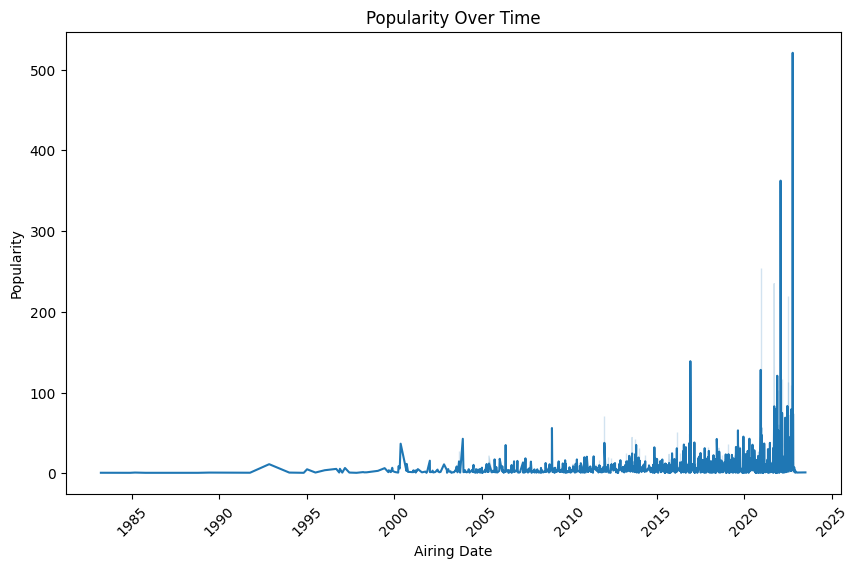

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the 'airing_date' column
plt.figure(figsize=(10, 6))
sns.lineplot(x='airing_date', y='popularity', data=raw_series_df)
plt.title('Popularity Over Time')
plt.xlabel('Airing Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

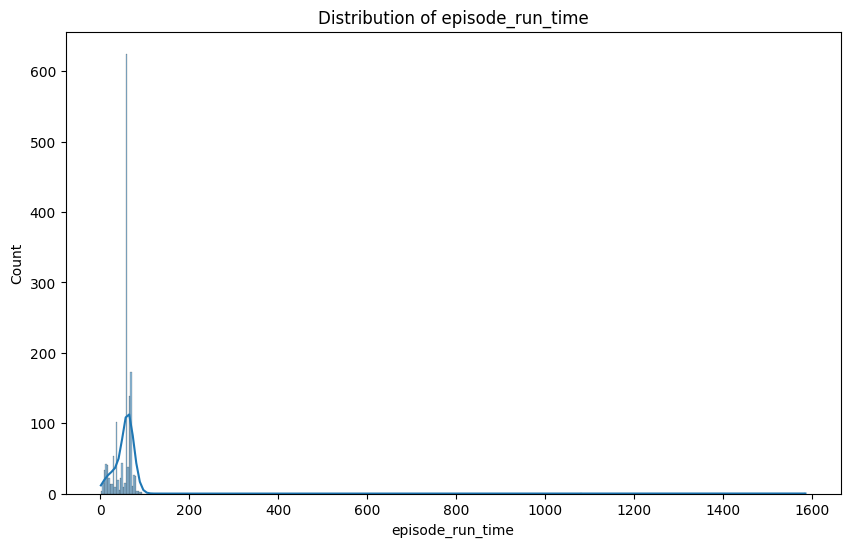

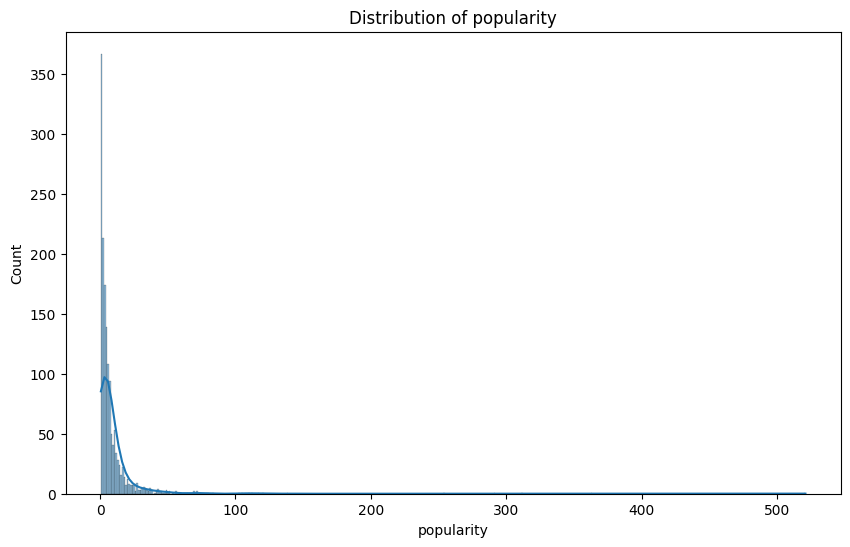

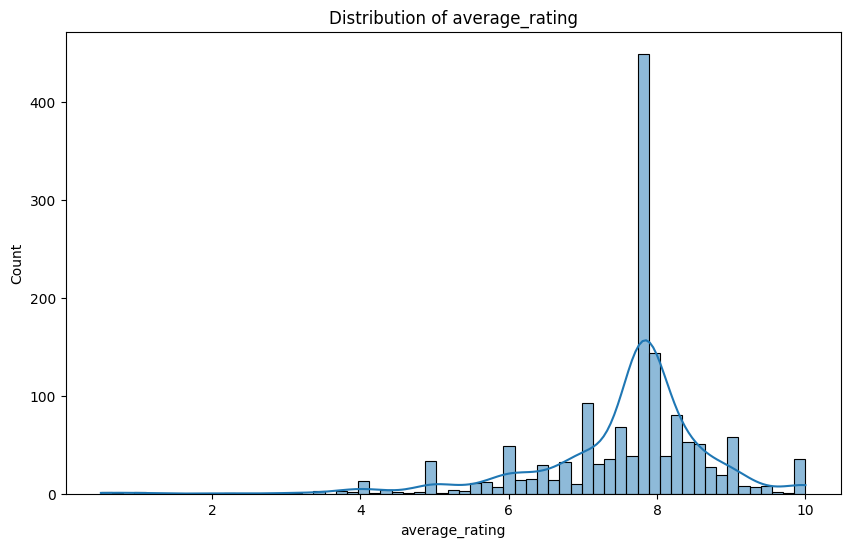

In [ ]:
# Plotting for numeric columns
numeric_columns = ['episode_run_time', 'popularity', 'average_rating']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(raw_series_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

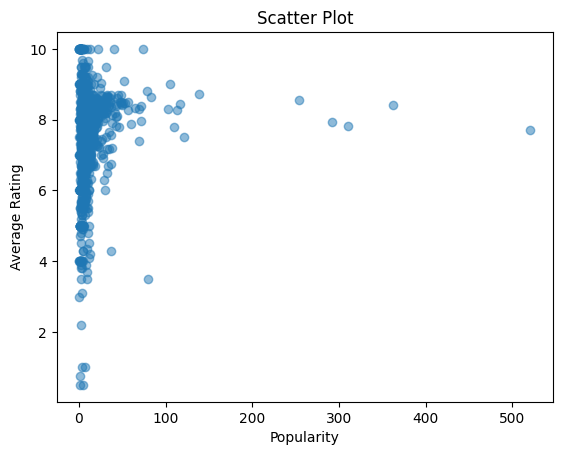

In [ ]:
# Select the columns for the X and Y axes (e.g., 'popularity' and 'average_rating')
x_data = data1['popularity']
y_data = data1['average_rating']

# Create a scatter plot
plt.scatter(x_data, y_data, alpha=0.5)

# Set the title and labels
plt.title("Scatter Plot")
plt.xlabel("Popularity")
plt.ylabel("Average Rating")

# Show the plot
plt.show()

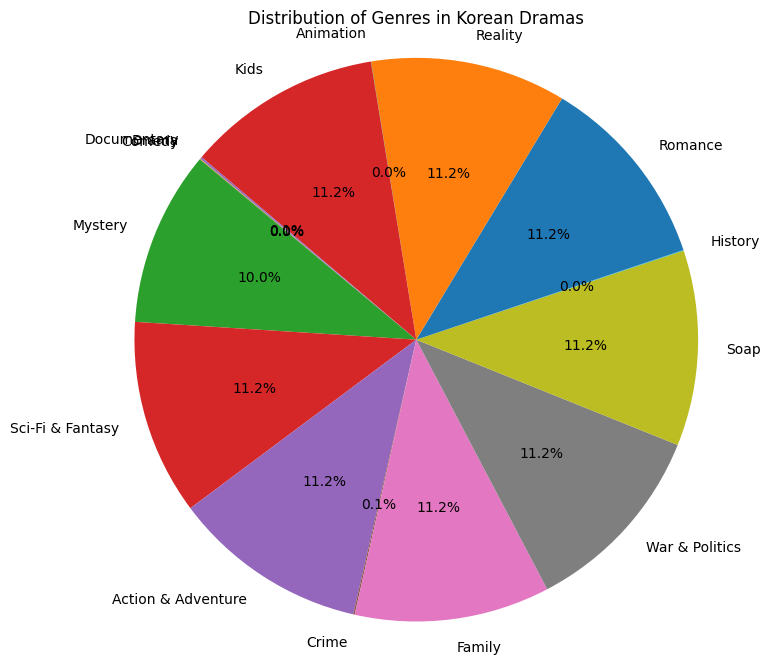

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genres_df.tmdb_id, labels=genres_df.name, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genres in Korean Dramas')

# Display the pie chart
plt.axis('equal')
plt.show()

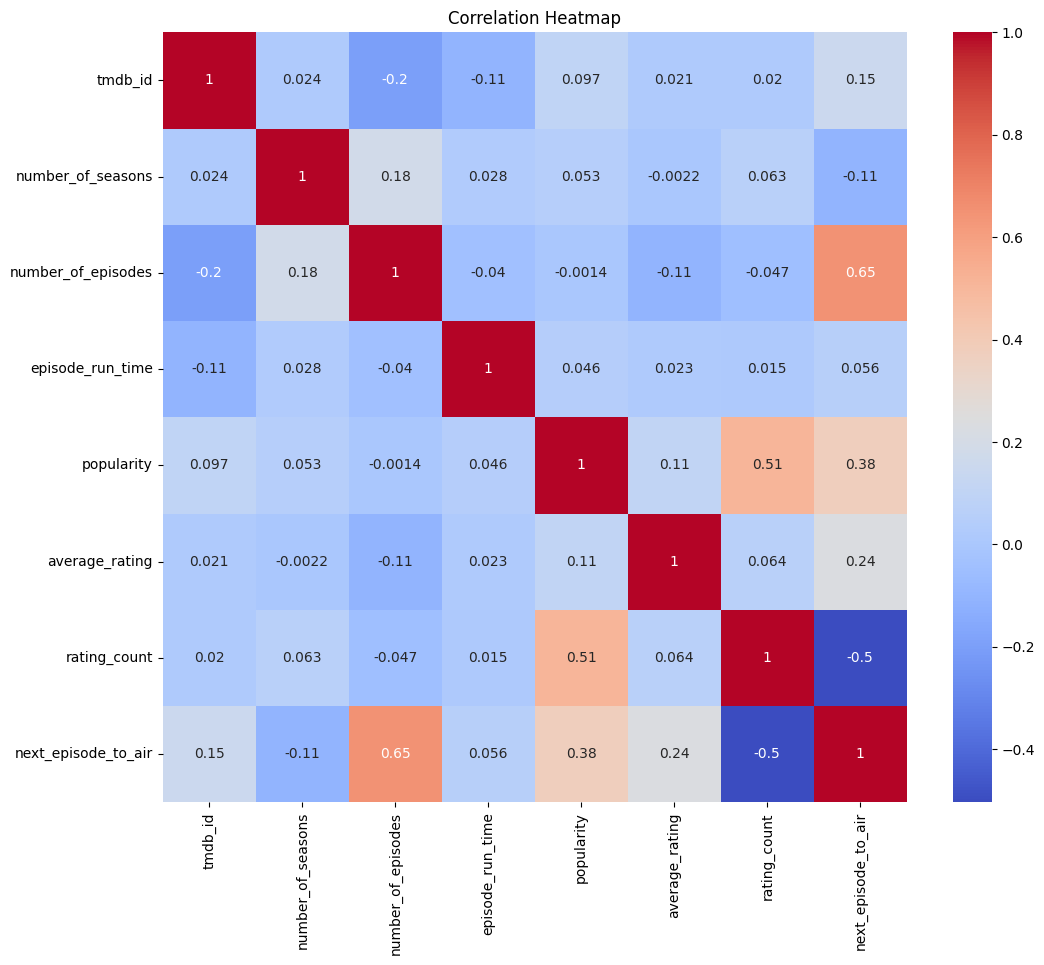

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data1.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [ ]:
new_columns = {"genres_ids": "genres", "networks_ids": "networks", "production_companies_ids": "production_companies", "directors_ids": "directors", "cast_ids": "cast"}
raw_series_df = raw_series_df.rename(columns = new_columns)
raw_series_df = raw_series_df[["tmdb_id", "name", "cast", "genres", "synopsis"]]
raw_series_df.isna().sum()

tmdb_id     0
name        0
cast        0
genres      0
synopsis    0
dtype: int64

In [ ]:
#top 5 k dramas
raw_series_df.name.head()

0                                      Glitch
1                          All of Us Are Dead
2                                  Squid Game
3    Money Heist: Korea - Joint Economic Area
4                                 True Beauty
Name: name, dtype: object

# **Recommendation using Cosine Similarity**

##using cosine similartiy to calculate the cosine similiarity all pairs of data inthe vectors matrix.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
# Function to preprocess and clean text data
def clean_text(text):
    text = text.lower()
    words = text.split()
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Preprocess and clean the data
raw_series_df['cast'] = raw_series_df['cast'].apply(clean_text)
raw_series_df['genres'] = raw_series_df['genres'].apply(clean_text)
raw_series_df['synopsis'] = raw_series_df['synopsis'].apply(clean_text)

# Combine text data into a single column
raw_series_df['tags'] = raw_series_df['cast'] + ' ' + raw_series_df['synopsis'] + ' ' + raw_series_df['genres']

# Use CountVectorizer to vectorize the text data
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(raw_series_df['tags']).toarray()

# Calculate cosine similarity
similarity = cosine_similarity(vectors)

In [ ]:
# Main recommendation function
def recommend(series_name):
    if series_name not in raw_series_df['name'].values:
        print(f"Series '{series_name}' not found.")
        return

    series_index = raw_series_df[raw_series_df['name'] == series_name].index[0]
    distances = similarity[series_index]

    # Sort and get the top 10 similar series
    series_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:11]

    print(f"Top 10 series similar to '{series_name}':")
    for i, (index, similarity_score) in enumerate(series_list):
        similar_series_name = raw_series_df.iloc[index]['name']
        print(f"{i + 1}. {similar_series_name}")

In [ ]:
# Example usage of recommeder system
recommend("Business Proposal")

Top 10 series similar to 'Business Proposal':
1. Reincarnation Love
2. Flower Ever After
3. I Hate Going to Work
4. Oh! Master
5. Little Mom Scandal
6. The Third Charm
7. Somebody
8. The Secret Lovers
9. W.H.Y. : What Happened to Your relationship
10. The King Dae Joyoung


# **Recommendation System Using User-Based Collaborative Filtering**

##fitering recommedndation system and evaluating performance using RMSE.

In [ ]:
!pip install surprise
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Sample data
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'item_id': ['A', 'B', 'A', 'C', 'B', 'D', 'C', 'E', 'D', 'E'],
    'rating': [5, 4, 4, 3, 5, 4, 3, 2, 4, 1],
}

# Create a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Create a Surprise Dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# Split the dataset into a training set and a test set
trainset, testset = train_test_split(data, test_size=0.2)

# Build the user-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

# Function to get top N recommendations for a user
def get_top_n_recommendations(predictions, n=5):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not top_n.get(uid):
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3463
RMSE: 1.346291201783626


In [ ]:
# Get recommendations for a user (replace user_id with the desired user)
user_id = 2
n_recommendations = 5
top_n_recommendations = get_top_n_recommendations(predictions, n=n_recommendations)

print(f'Top {n_recommendations} recommendations for User {user_id}:')
for item, rating in top_n_recommendations[user_id]:
    print(f'Item ID: {item}, Estimated Rating: {rating}')


Top 5 recommendations for User 2:


KeyError: ignored

# **Note**

* **Currently, I'm working on the algorithms,  I have used a dummy dataset and need to apply with a real data/